Linear Regression
=================

A multivariate linear regression is fitted to understand the effects of the features on the median score.

In [1]:
import pandas as pd
import dask.dataframe as dd

import imp

plot = imp.load_source('plot', '../src/plot.py')

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
features = [
    "CC_to_C_rate",
    "CD_to_C_rate",
    "DC_to_C_rate",
    "DD_to_C_rate",
    "SSE",
    "Cooperation_rating",
    "Cooperation_rating_max",
    "Cooperation_rating_min",
    "Cooperation_rating_median",
    "Cooperation_rating_mean",
    "Cooperation_rating_comp_to_max",
    "Cooperation_rating_comp_to_min",
    "Cooperation_rating_comp_to_median",
    "Cooperation_rating_comp_to_mean",
    "repetitions",
]

In [5]:
dfs = []
for name in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv('../data/%s_3_processed.csv' % name, index_col=0
                           )
    df['type'] = name
    dfs.append(df)

In [6]:
types = ['standard', 'noise', 'probend', 'probend_noise']

In [7]:
dfs[0].head()

,Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,...,Cooperation_rating_max,Cooperation_rating_min,Cooperation_rating_median,Cooperation_rating_mean,Cooperation_rating_comp_to_max,Cooperation_rating_comp_to_min,Cooperation_rating_comp_to_median,Cooperation_rating_comp_to_mean,memory_usage,type
0,0,EvolvedLookerUp2_2_2,2.969925,0.704614,28.0,1.0,0.639084,0.065530,0.189481,0.105905,...,0.966144,0.0,0.664537,0.60628,0.729305,0.0,1.060307,1.162192,1.000000,standard
1,1,Evolved FSM 16 Noise 05,2.874888,0.696800,21.0,1.0,0.676353,0.020448,0.135146,0.168054,...,0.966144,0.0,0.664537,0.60628,0.721218,0.0,1.048550,1.149304,1.000000,standard
2,2,PSO Gambler 1_1_1,2.874216,0.684317,23.0,1.0,0.650701,0.033616,0.151543,0.164140,...,0.966144,0.0,0.664537,0.60628,0.708298,0.0,1.029765,1.128714,1.000000,standard
3,3,PSO Gambler Mem1,2.861493,0.705582,23.0,1.0,0.663295,0.042287,0.144599,0.149819,...,0.966144,0.0,0.664537,0.60628,0.730308,0.0,1.061764,1.163789,0.007463,standard
4,4,Winner12,2.834701,0.681854,20.0,1.0,0.650588,0.031267,0.140920,0.177226,...,0.966144,0.0,0.664537,0.60628,0.705749,0.0,1.026059,1.124652,0.014925,standard


**Standard Tournaments**

In [8]:
max(dfs[0]['turns']), max(dfs[0]['size']), max(dfs[0]['repetitions'])

(200.0, 195.0, 100.0)

In [33]:
a_type = types[0]
df = dfs[0]
    
xs = features.copy()
xs += ["turns", "memory_usage"]

In [34]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('Cooperation_rating_median')
xs.remove('DD_to_C_rate')

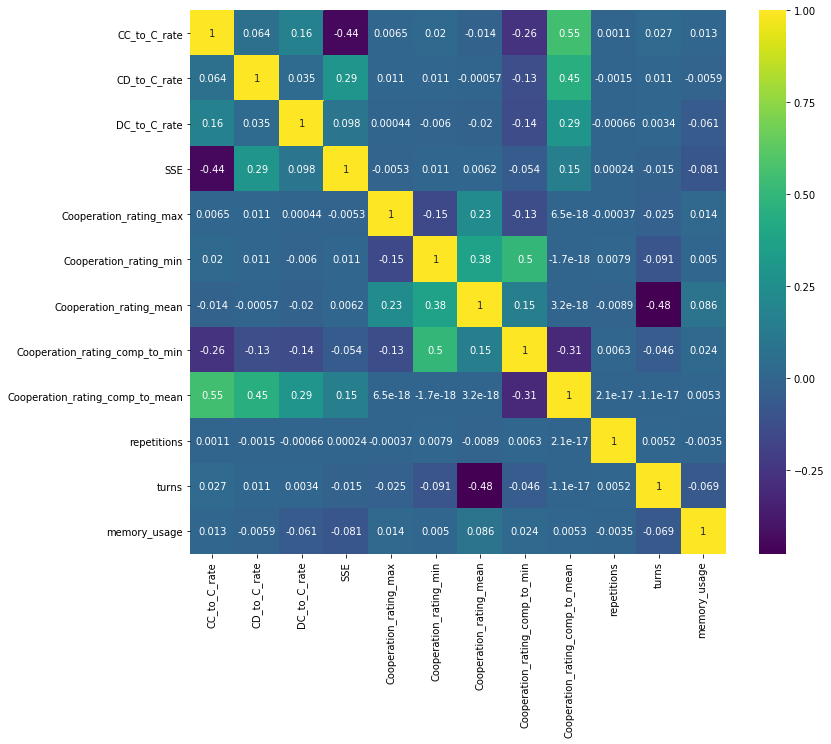

In [35]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [36]:
features_standard = xs.copy()

In [40]:
X = df[features_standard].values
y = df['Median_score'].values

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=['constant'] + xs))

standard
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                 1.137e+05
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:27:25   Log-Likelihood:                 98939.
No. Observations:             1005043   AIC:                        -1.979e+05
Df Residuals:                 1005030   BIC:                        -1.977e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
c

**Noisy Tournaments**

In [41]:
index = 1
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ['noise', 'memory_usage']

In [42]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_max')
xs.remove('DD_to_C_rate')

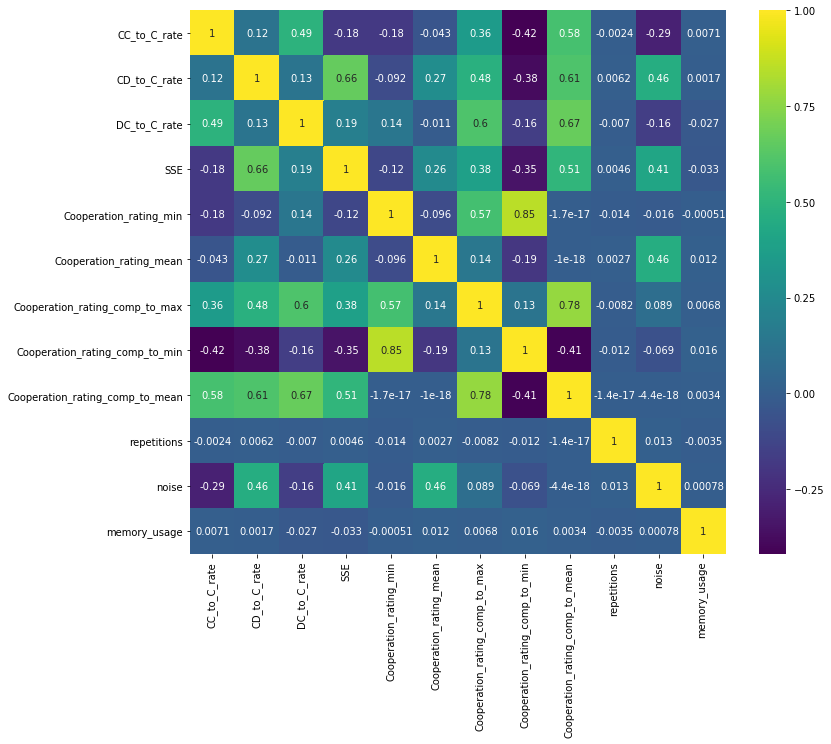

In [43]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [17]:
features_noisy = xs.copy()

In [44]:
X = df[features_noisy].values
y = df['Median_score'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

noise
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.141e+07
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                        0.00
Time:                        21:27:50   Log-Likelihood:                      2.2219e+05
No. Observations:             1005190   AIC:                                 -4.444e+05
Df Residuals:                 1005178   BIC:                                 -4.442e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------

**Probabilistic Ending Tournaments**

In [45]:
index = 2
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["probend"]

In [46]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_max')
xs.remove('DD_to_C_rate')

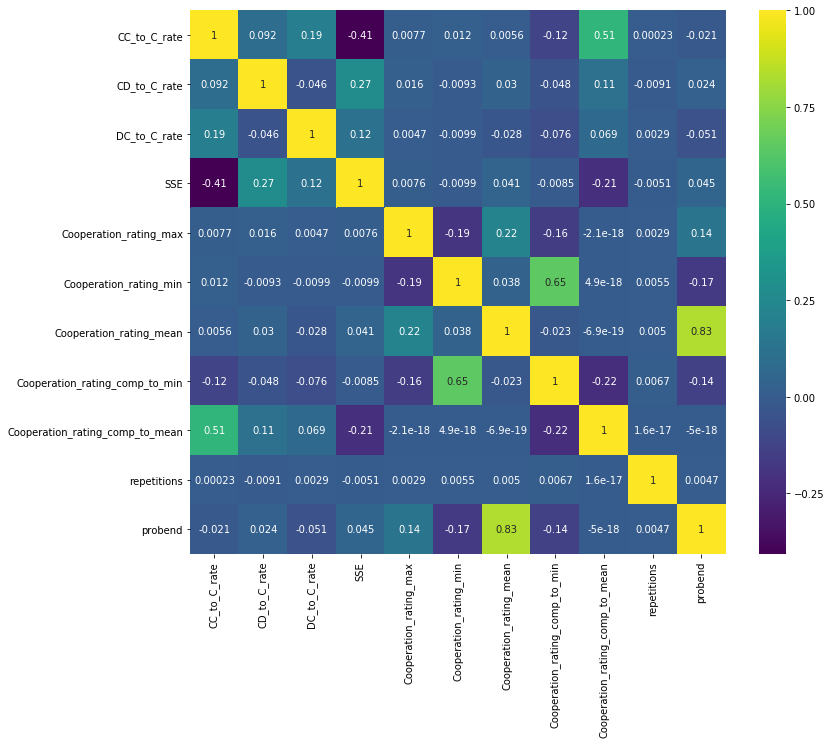

In [47]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [48]:
features_probend = xs.copy()

In [49]:
X = df[features_probend].values
y = df['Median_score'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

probend
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.799e+07
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                        0.00
Time:                        21:28:01   Log-Likelihood:                      2.2450e+05
No. Observations:             1005190   AIC:                                 -4.490e+05
Df Residuals:                 1005179   BIC:                                 -4.488e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------

**Noisy Probabilistic Ending Tournaments**

In [50]:
index = 3
a_type = types[index]
df = dfs[index]
    
xs = features.copy()
xs += ["probend", "noise"]

In [51]:
xs.remove('Cooperation_rating')
xs.remove('Cooperation_rating_median')
xs.remove('Cooperation_rating_comp_to_median')
xs.remove('Cooperation_rating_comp_to_min')
xs.remove('Cooperation_rating_min')
xs.remove('noise')
xs.remove('DD_to_C_rate')

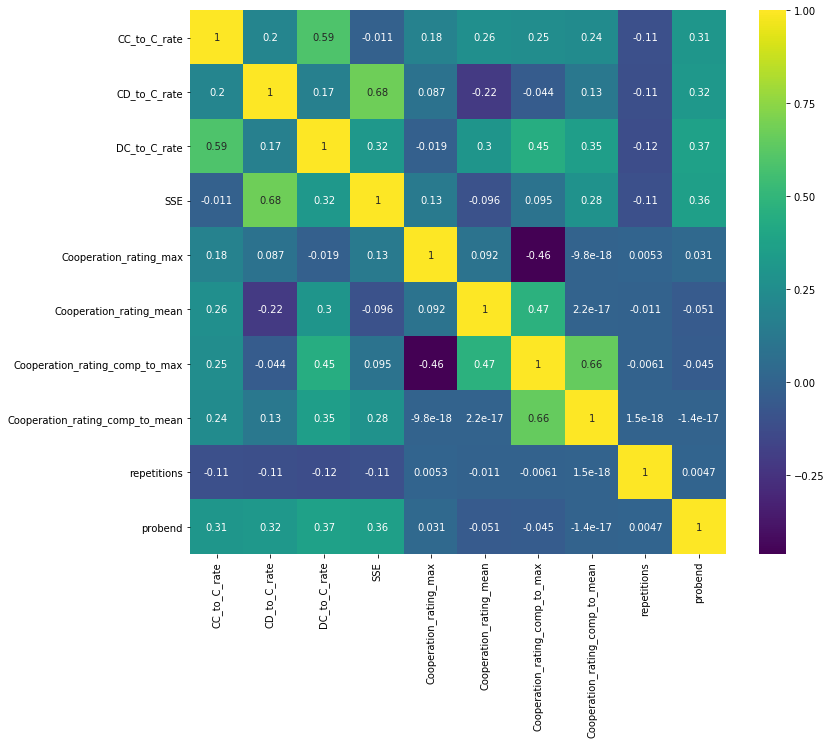

In [52]:
plt.figure(figsize=(12,10))

cor = df[xs].corr()

sns.heatmap(cor, annot=True, cmap="viridis");

In [53]:
features_probend_noisy = xs.copy()

In [54]:
X = df[features_probend_noisy].values
y = df['Median_score'].values

model = sm.OLS(y, X).fit()

print("============")
print(f"{a_type}")
print("============")
print(model.summary(xname=xs))

probend_noise
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          7.796e+06
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                        0.00
Time:                        21:28:11   Log-Likelihood:                         -57934.
No. Observations:             1005190   AIC:                                  1.159e+05
Df Residuals:                 1005180   BIC:                                  1.160e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
------

In [55]:
tables = []
rs = []
for i, xs in enumerate([features_standard, features_noisy, features_probend, features_probend_noisy]):
    df = dfs[i]

    X = df[xs].values
    y = df['Median_score'].values

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    table = model.summary2(xname=['constant'] + xs)
    rs.append(table.tables[0][2][0] + table.tables[0][3][0])
    table = table.tables[1][['Coef.', 'P>|t|']].round(5)
    table.index = ['constant'] + [plot.features_labels[index] for index in table.index[1:]]
    
    tables.append(table)

In [56]:
pd.concat(tables, axis=1).round(3)

,Coef.,P>|t|,Coef.,P>|t|,Coef.,P>|t|,Coef.,P>|t|
$CC$ to $C$ rate,0.043,0.000,-0.380,0.000,0.224,0.000,0.078,0.0
$CD$ to $C$ rate,-0.325,0.000,0.124,0.000,0.060,0.000,0.073,0.0
$C_r$ / $C_{max}$,NaN,NaN,-1.044,0.000,NaN,NaN,-1.251,0.0
$C_r$ / $C_{mean}$,0.553,0.000,-0.101,0.000,-1.136,0.000,-0.089,0.0
$C_{max}$,0.059,0.000,NaN,NaN,-0.044,0.086,-1.396,0.0
$C_{mean}$,1.837,0.000,3.078,0.000,1.506,0.000,3.645,0.0
$C_{min}$,0.156,0.000,1.528,0.000,0.311,0.000,NaN,NaN
$C_{min}$ / $C_r$,-0.049,0.000,-0.378,0.000,-0.204,0.000,NaN,NaN
$DC$ to $C$ rate,-0.204,0.000,0.074,0.000,0.066,0.000,0.066,0.0
$k$,-0.000,0.853,-0.000,0.987,0.000,0.008,0.000,0.0


In [30]:
pd.concat(tables, axis=1).round(3)

,Coef.,P>|t|,Coef.,P>|t|,Coef.,P>|t|,Coef.,P>|t|
$CC$ to $C$ rate,-0.042,0.000,-0.007,0.000,0.017,0.000,0.111,0.0
$CD$ to $C$ rate,0.297,0.000,-0.068,0.000,0.182,0.000,0.023,0.0
$C_r$ / $C_{max}$,NaN,NaN,1.856,0.000,NaN,NaN,1.256,0.0
$C_r$ / $C_{mean}$,-0.468,0.000,-0.577,0.000,0.525,0.000,-0.120,0.0
$C_{max}$,-0.071,0.000,NaN,NaN,-0.022,0.391,1.130,0.0
$C_{mean}$,0.118,0.000,-2.558,0.000,-0.023,0.001,-1.489,0.0
$C_{min}$,-0.161,0.000,-1.179,0.000,-0.170,0.000,NaN,NaN
$C_{min}$ / $C_r$,0.057,0.000,-0.320,0.000,0.125,0.000,NaN,NaN
$DC$ to $C$ rate,0.198,0.000,0.040,0.000,-0.030,0.000,0.022,0.0
$k$,0.000,0.319,0.000,0.020,0.000,0.002,0.000,0.0


In [58]:
file = open('../paper/regression_results_on_median_score.tex', "w")
table_to_write = pd.concat(tables, axis=1).round(3).to_latex().replace('\$', '$').replace('\_', '_').replace('NaN', '  -')
file.write(table_to_write.replace('\{', '{').replace('\}', '}'))
file.close()

In [57]:
rs

['Adj. R-squared:0.576',
 'Adj. R-squared:0.679',
 'Adj. R-squared:0.816',
 'Adj. R-squared:0.930']